# <span style="color:green">Brazil Cases</span>

### source: https://covid.saude.gov.br/

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.rcParams.update({'font.size': 16})

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
filename = '/home/davi/Documents/Python/Covid-19-Data/HIST_PAINEL_COVIDBR_24ago2020.csv'

In [4]:
dfMS = pd.read_csv(filename, low_memory=False)
dfMS['data'] = pd.to_datetime(dfMS['data'], dayfirst=True)

In [5]:
dfMS = dfMS.loc[:,['data','estado','municipio','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']]
# dfMS = dfMS.loc[:,['data','estado','municipio','casosNovos','obitosNovos']]
dfMS['municipio'] = dfMS['municipio'].replace({'Á':'A', 'É':'E', 'Í':'I', 'Ó':'O', 'Ú':'U'})
dfMS = dfMS.sort_values(by=['estado','municipio'], ascending=True)
dfMS = dfMS.dropna()
dfMS

,data,estado,municipio,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
13099,2020-03-27,AC,Acrelândia,0,0,0,0
13100,2020-03-28,AC,Acrelândia,0,0,0,0
13101,2020-03-29,AC,Acrelândia,2,2,0,0
13102,2020-03-30,AC,Acrelândia,6,4,0,0
13103,2020-03-31,AC,Acrelândia,7,1,0,0
...,...,...,...,...,...,...,...
73494,2020-08-20,TO,Xambioá,648,1,9,1
73495,2020-08-21,TO,Xambioá,654,6,9,0
73496,2020-08-22,TO,Xambioá,656,2,9,0
73497,2020-08-23,TO,Xambioá,657,1,9,0


In [6]:
recent_date = dfMS['data'].max().date()
recent_date

datetime.date(2020, 8, 24)

In [7]:
listCity = dfMS['municipio'].astype(str).unique()
listCity

array(['Acrelândia', 'Assis Brasil', 'Brasiléia', ..., 'Tupiratins',
       'Wanderlândia', 'Xambioá'], dtype=object)

In [8]:
listState = dfMS['estado'].astype(str).unique()
listState

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [9]:
dfToday = dfMS[dfMS['data'] == dfMS['data'].max()]
dfToday

,data,estado,municipio,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
13249,2020-08-24,AC,Acrelândia,408,0,8,0
13400,2020-08-24,AC,Assis Brasil,472,0,9,0
13551,2020-08-24,AC,Brasiléia,1092,-1,17,1
13702,2020-08-24,AC,Bujari,362,0,6,0
13853,2020-08-24,AC,Capixaba,243,0,7,0
...,...,...,...,...,...,...,...
72743,2020-08-24,TO,Tocantínia,342,0,4,0
73045,2020-08-24,TO,Tupirama,46,0,1,0
73196,2020-08-24,TO,Tupiratins,8,1,0,0
73347,2020-08-24,TO,Wanderlândia,240,0,5,0


In [10]:
listState = dfMS['estado'].astype(str).unique()
listState

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [11]:
dfLocation = {}
for index in range(len(listState)):
    dfLocation[index] = dfToday[(dfToday['estado'] == listState[index])]
    dfLocation[index] = dfLocation[index].sort_values(by=['casosAcumulado'], ascending=True)
    dfLocation[index] = dfLocation[index].iloc[-20:]
    dfLocation[index] = dfLocation[index].loc[:,['municipio','casosAcumulado','obitosAcumulado']]
    dfLocation[index].set_index(['municipio'], inplace=True)
    dfLocation[index] = dfLocation[index].sort_values(by=['casosAcumulado'], ascending=False)

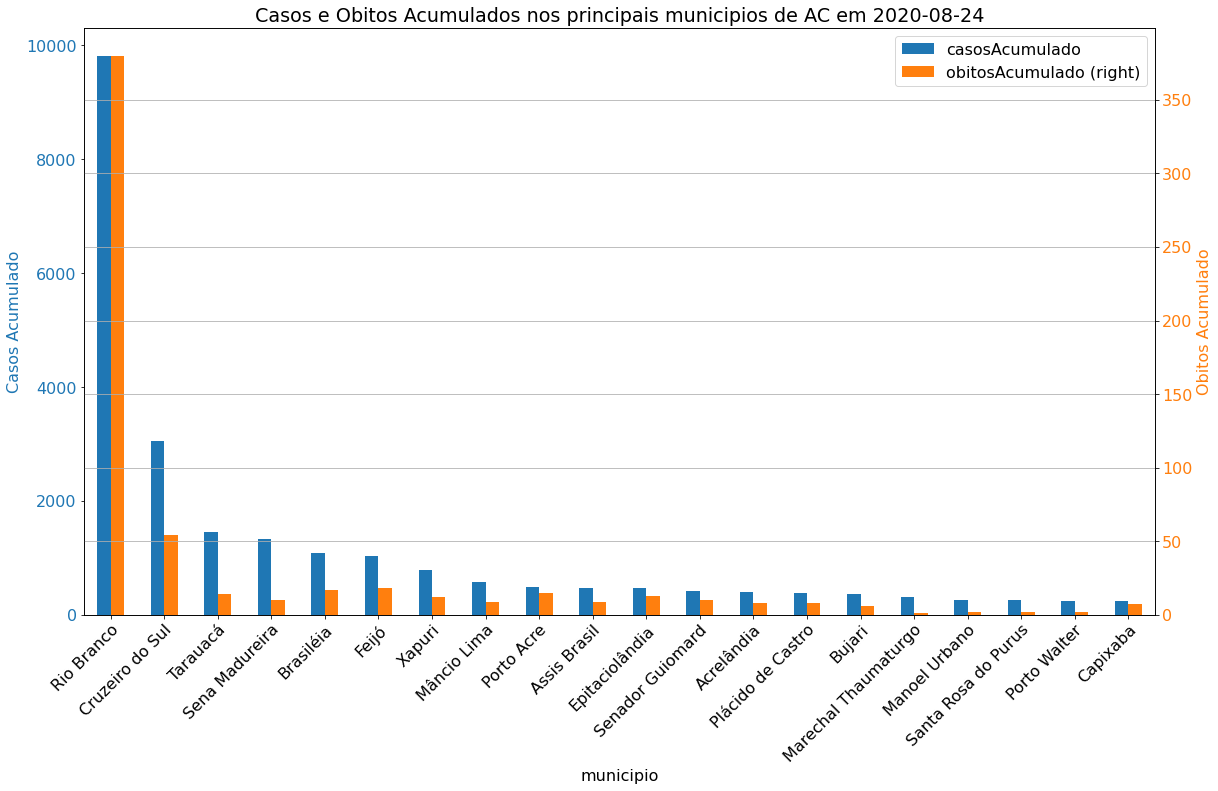

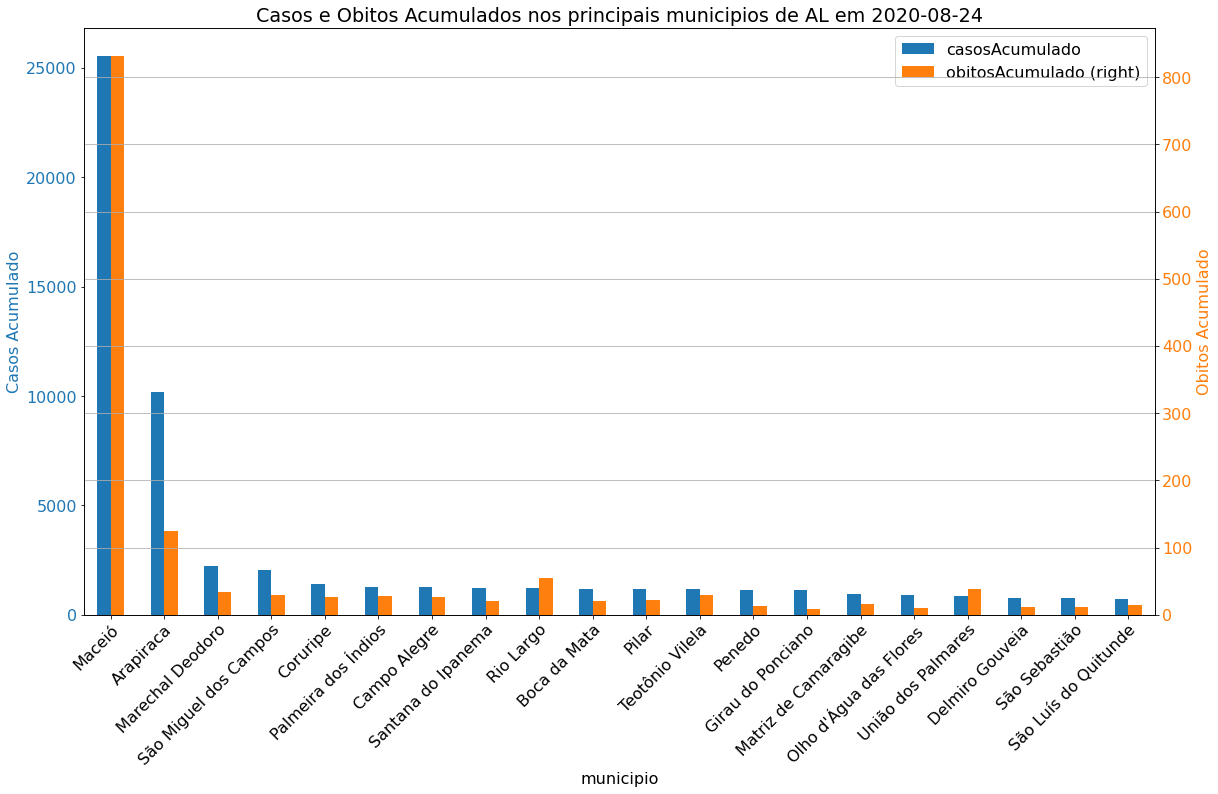

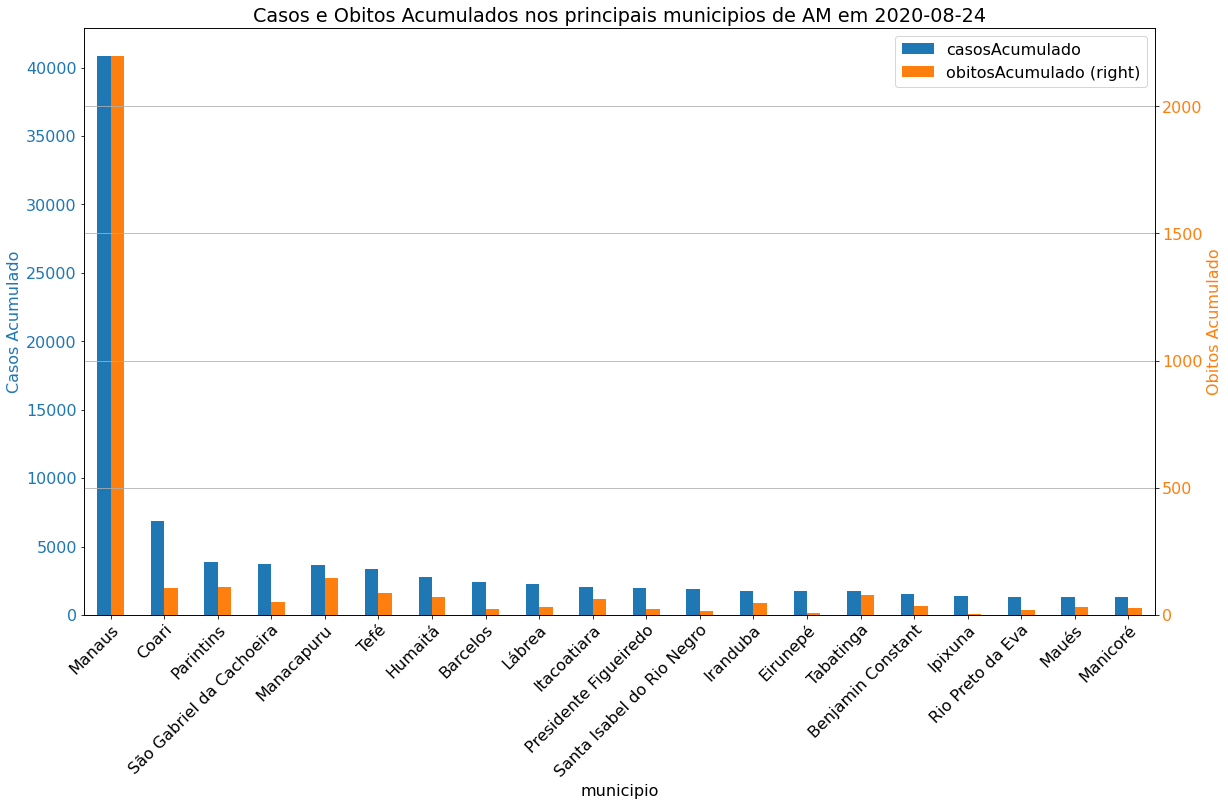

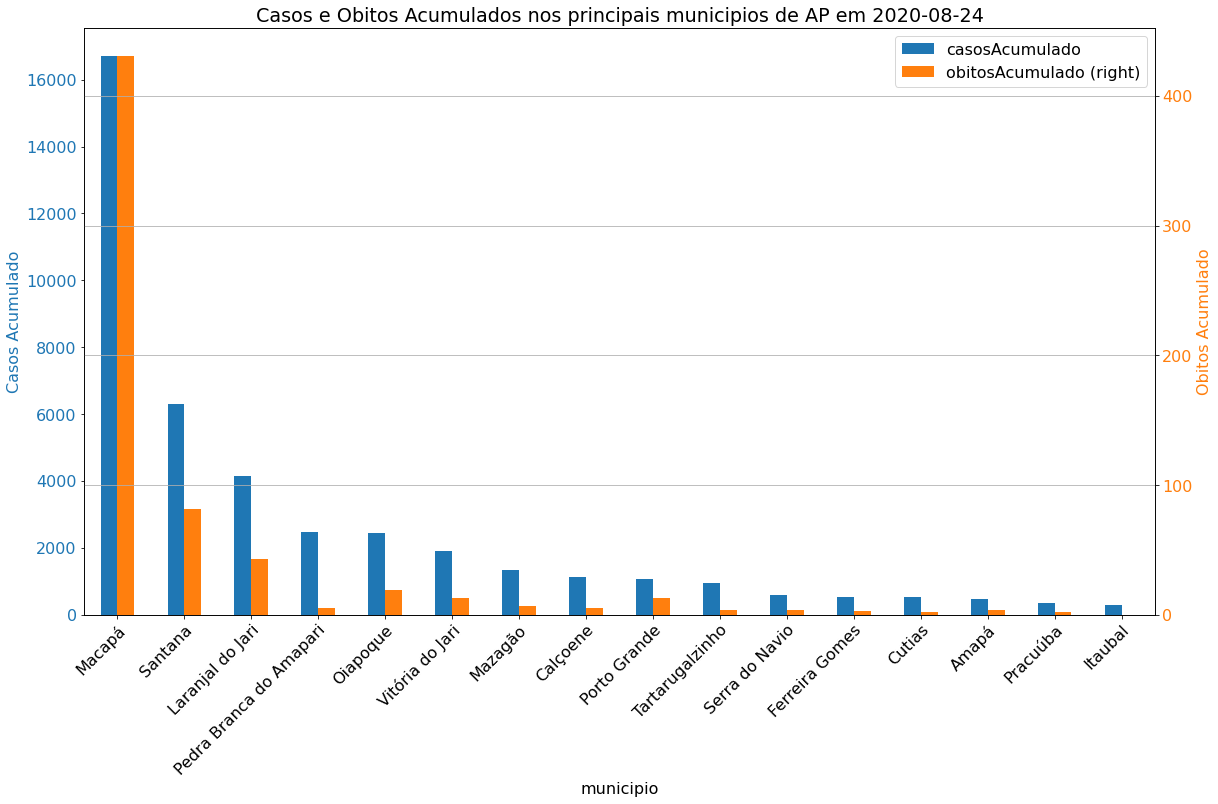

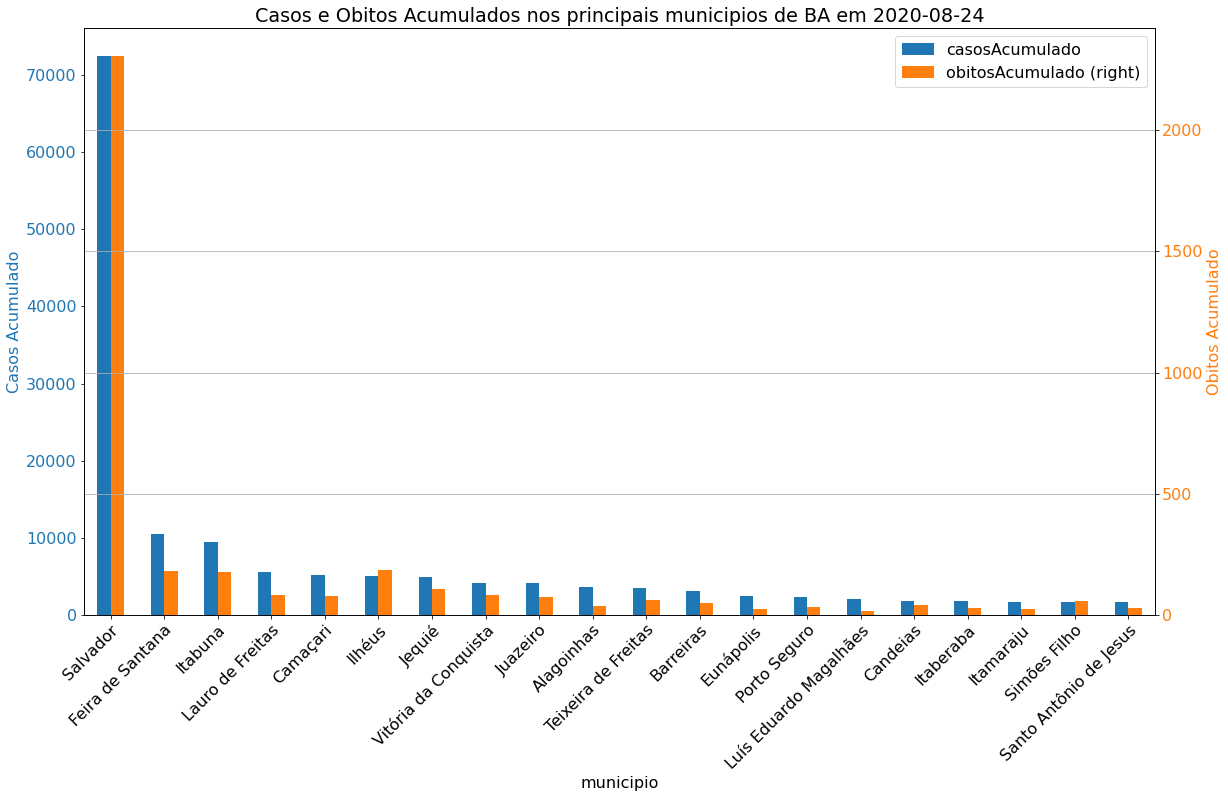

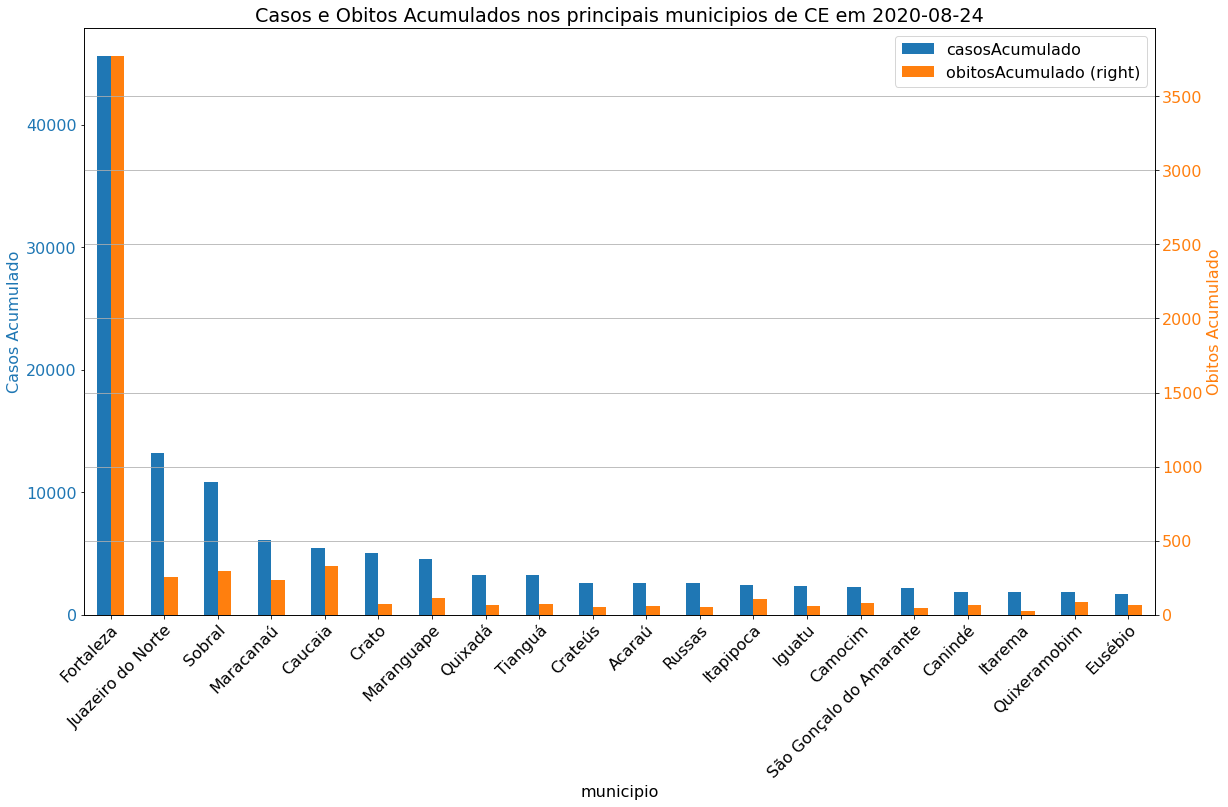

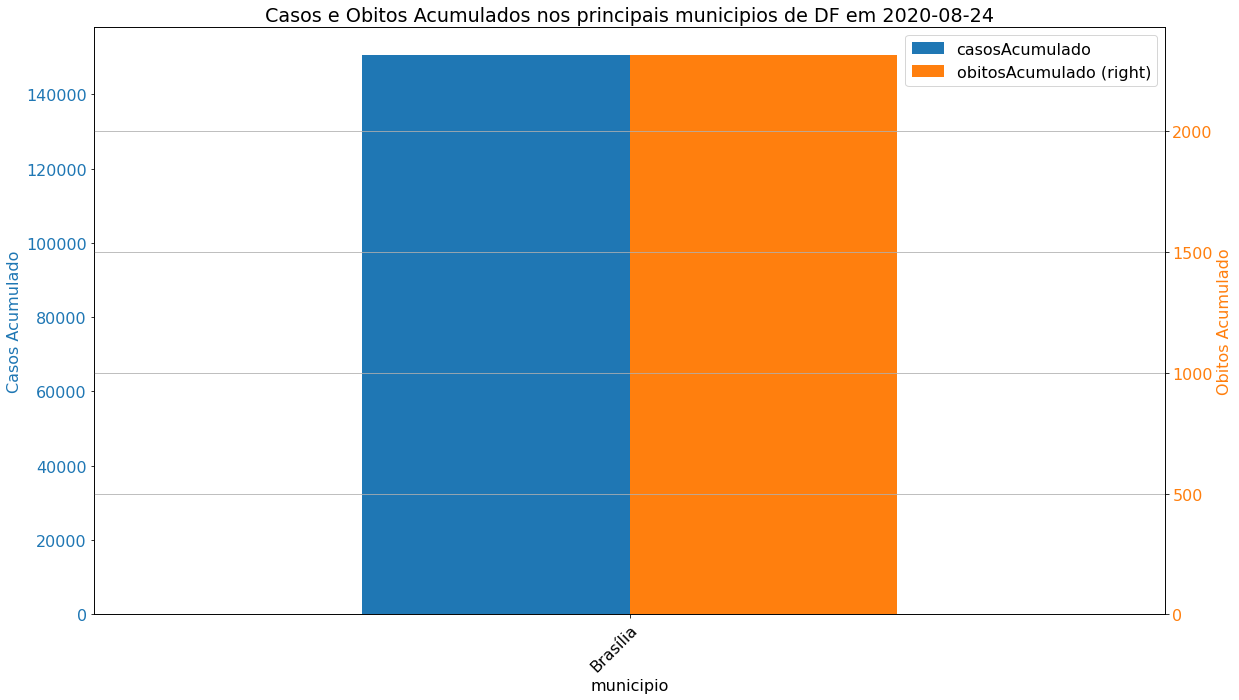

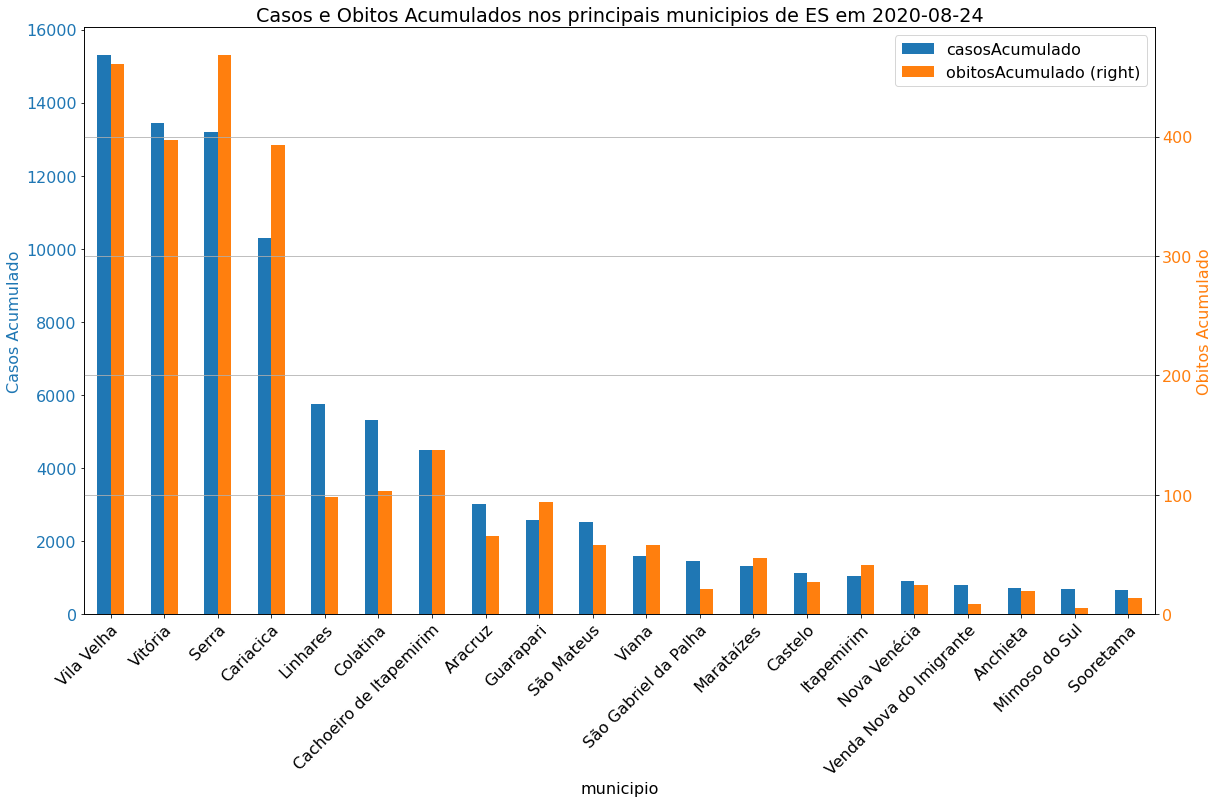

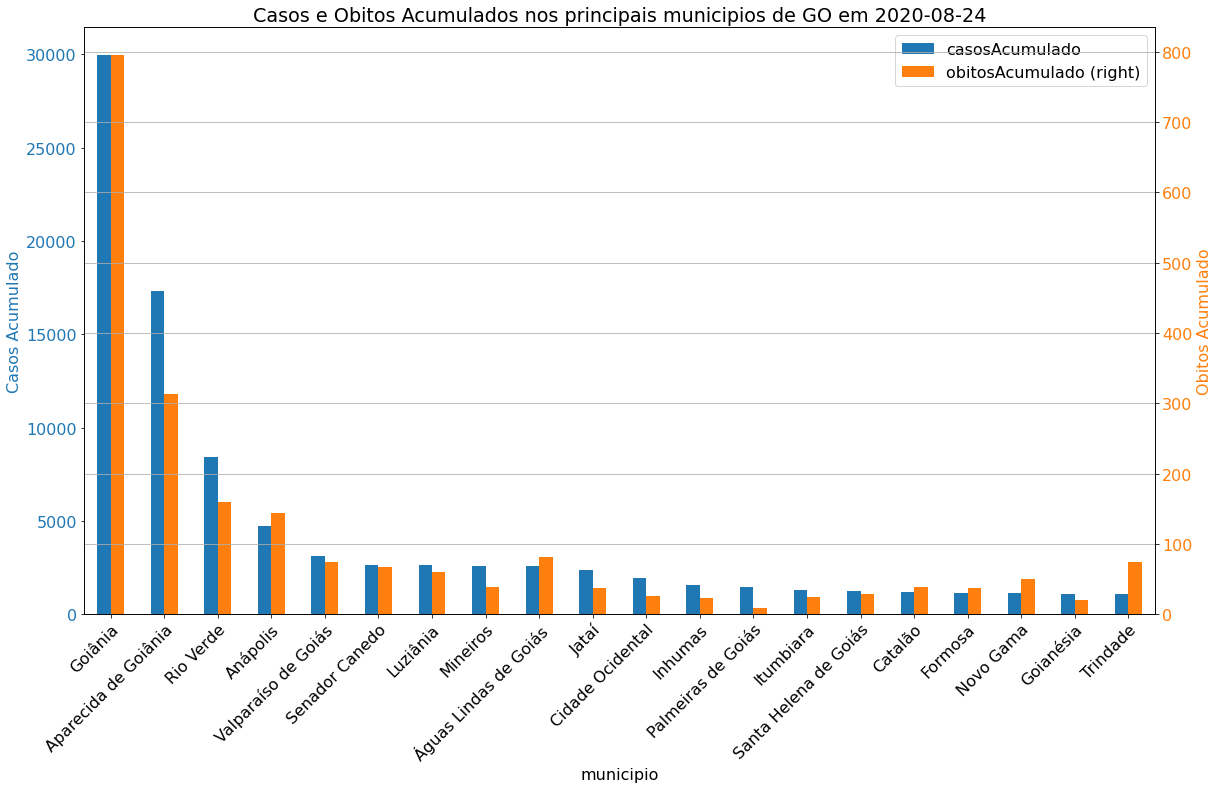

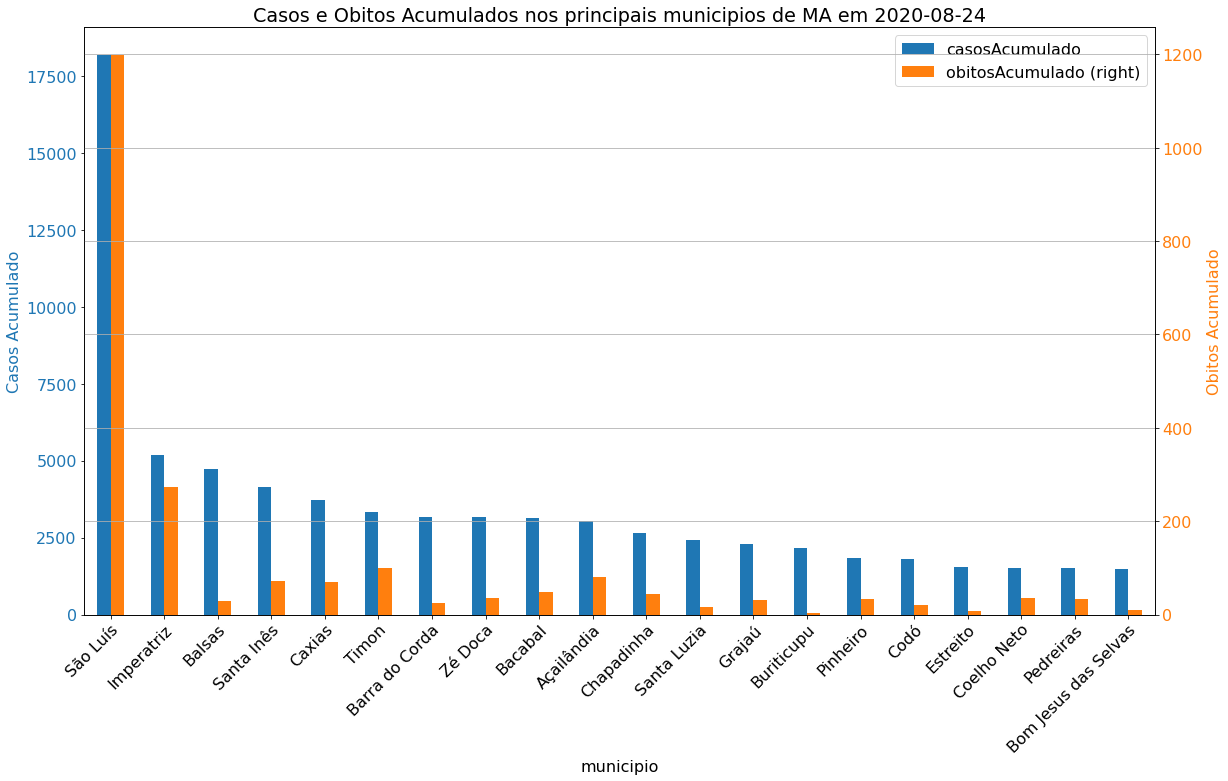

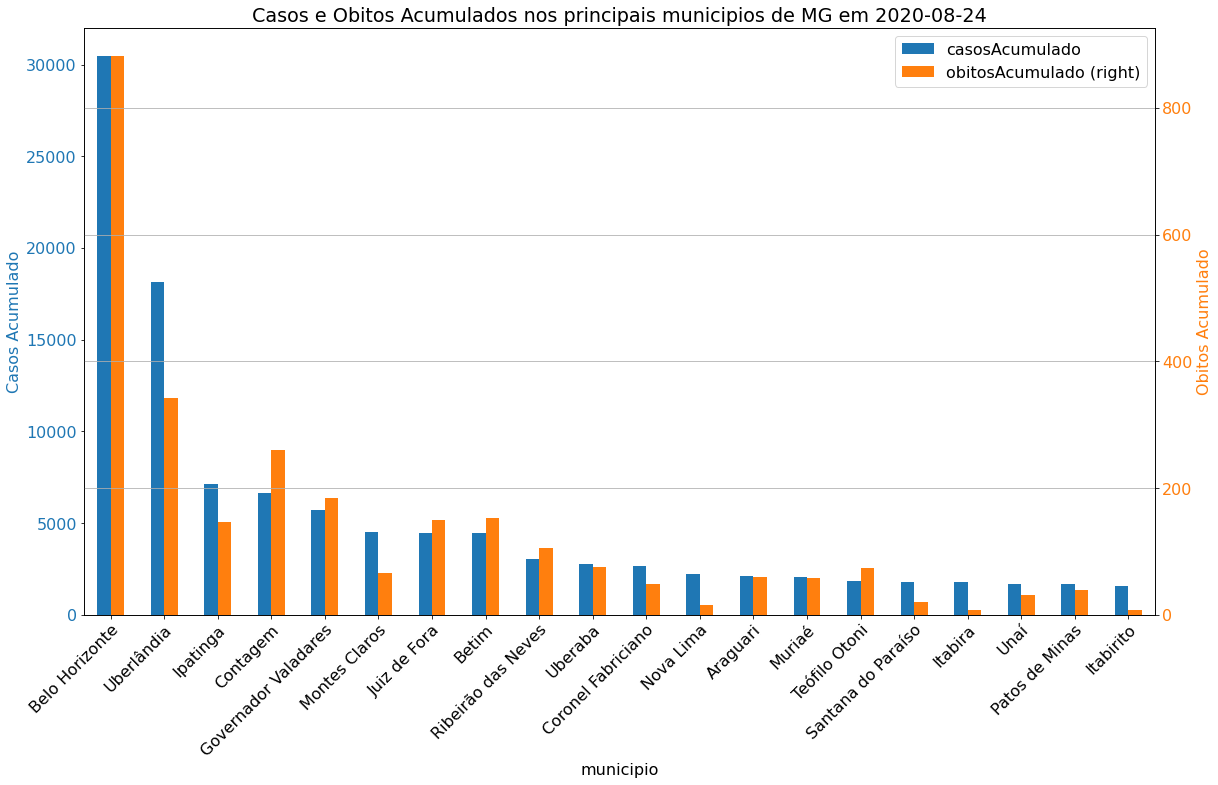

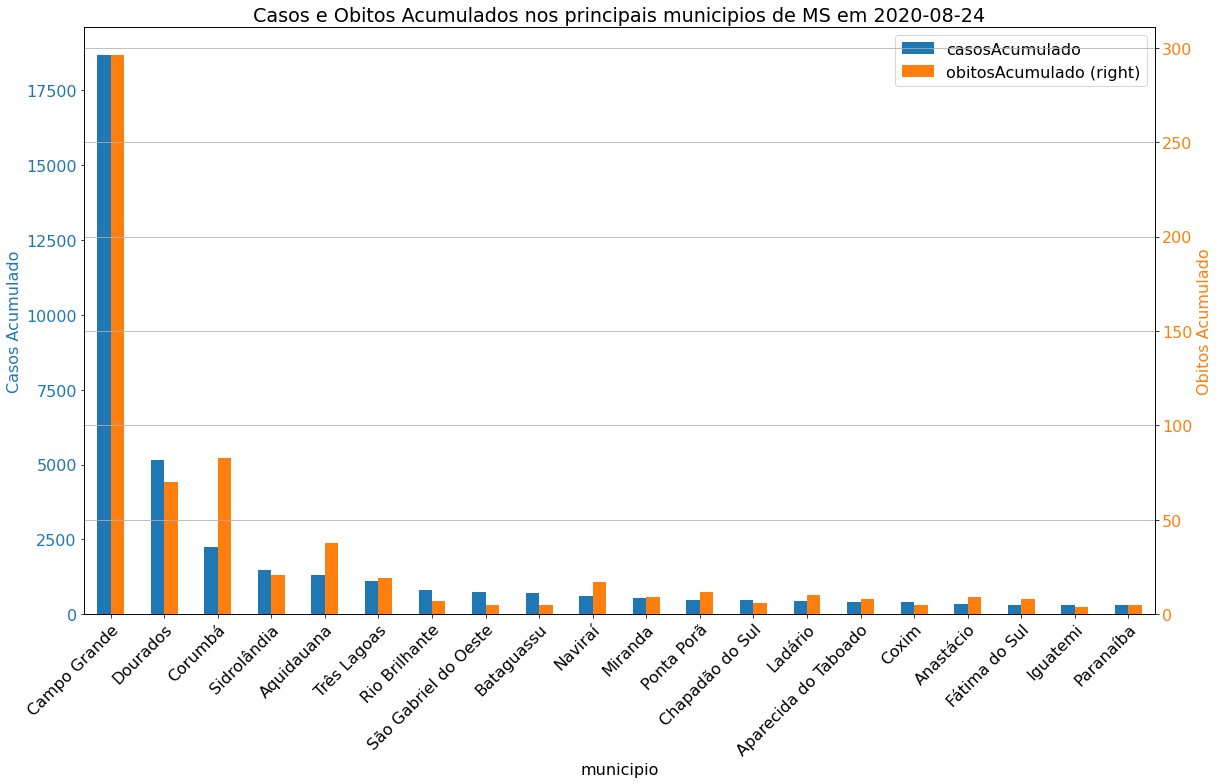

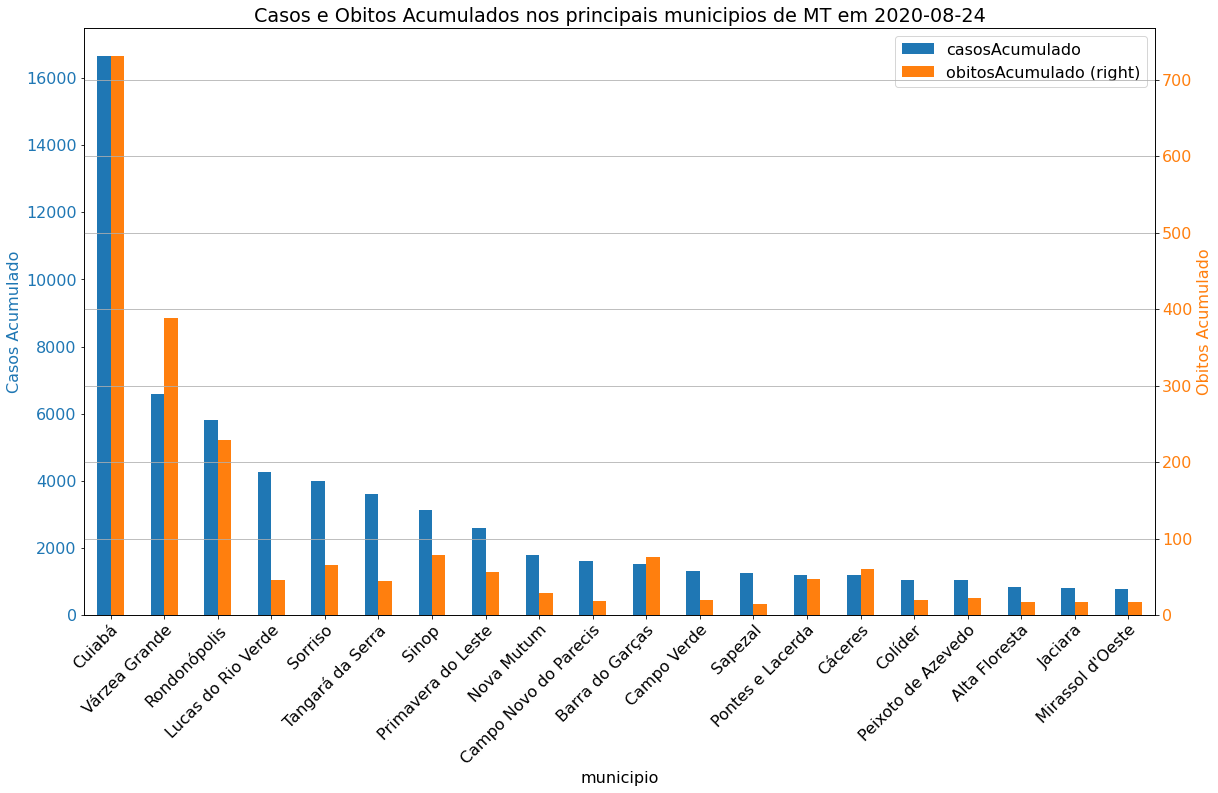

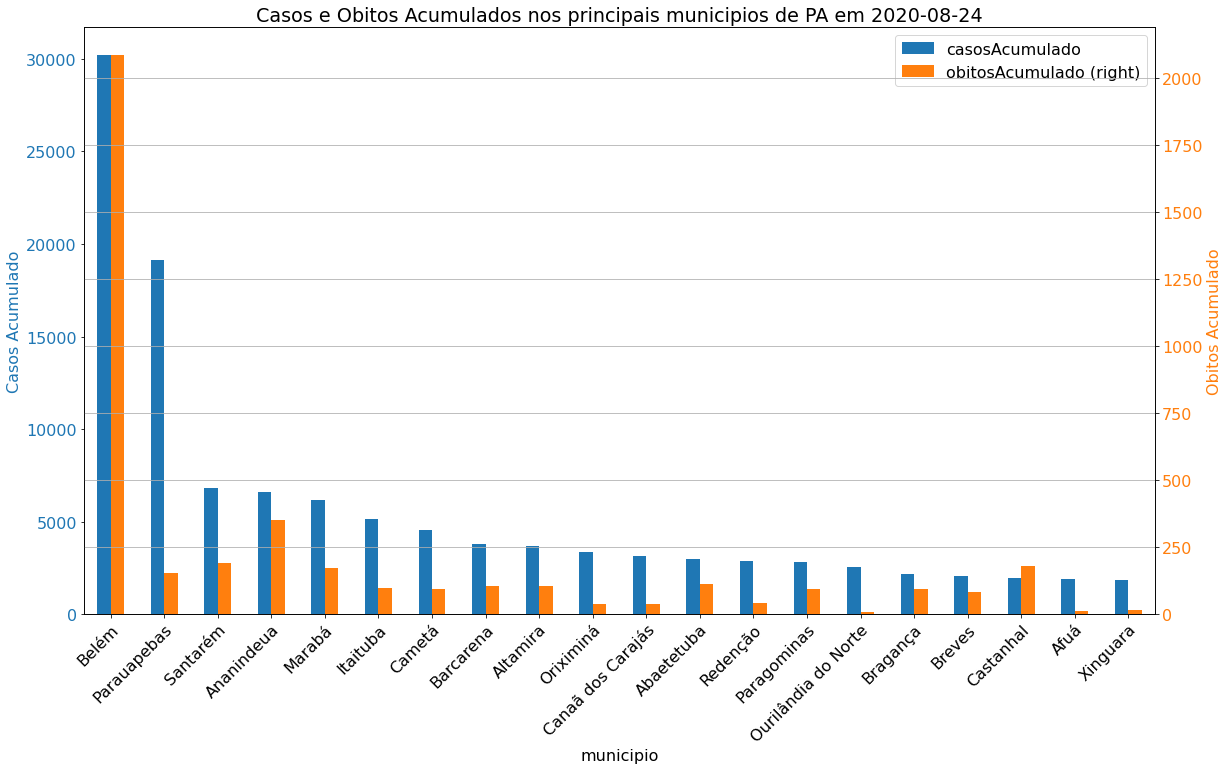

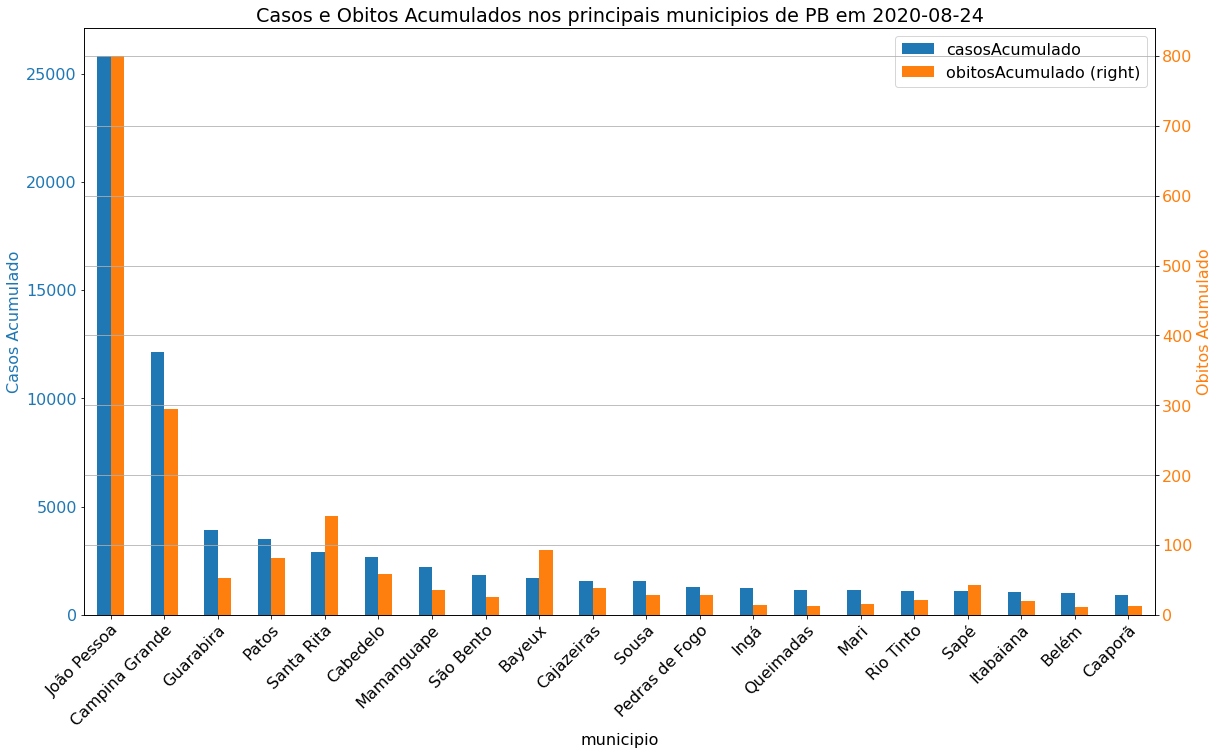

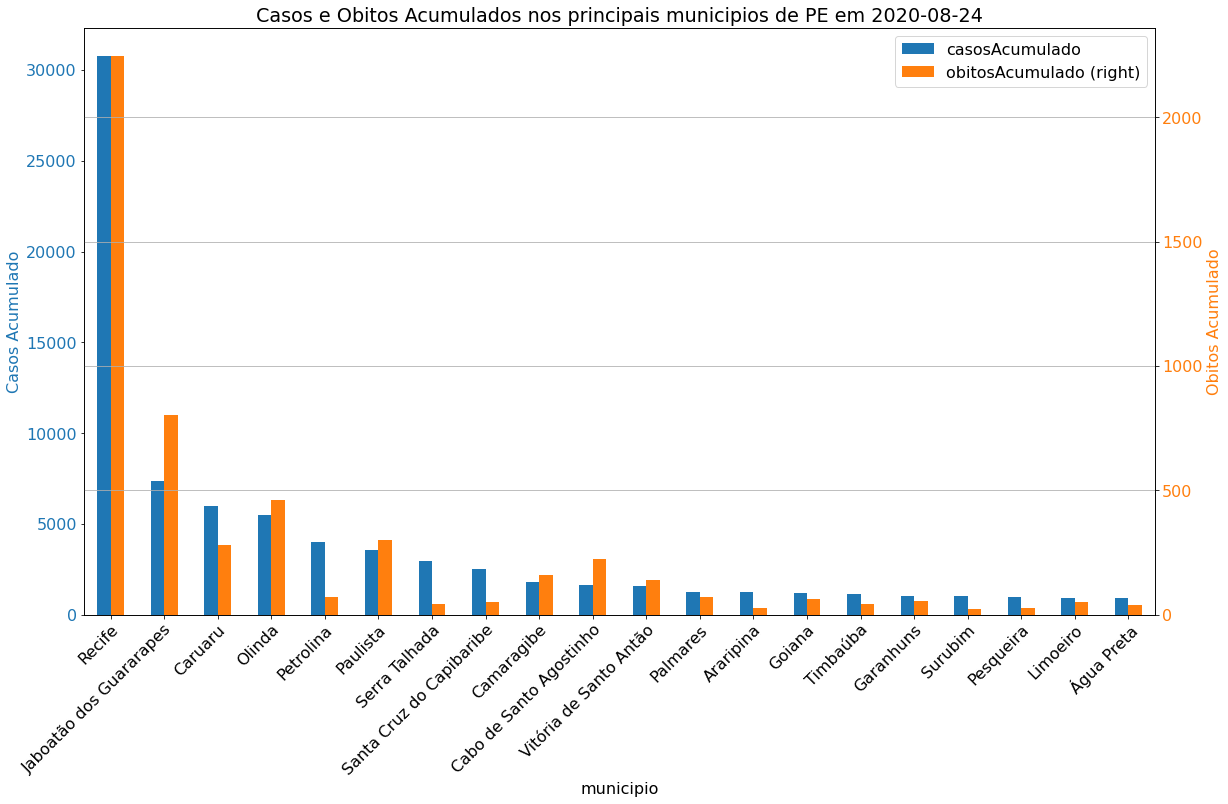

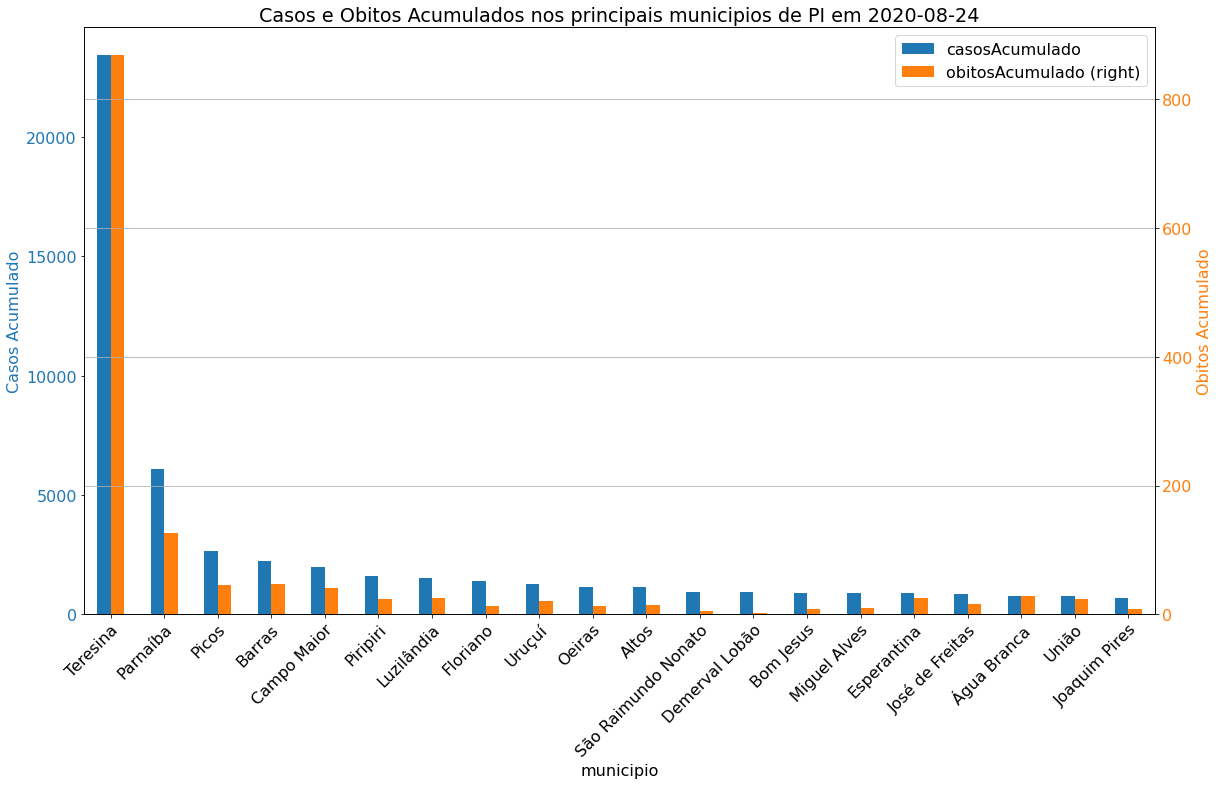

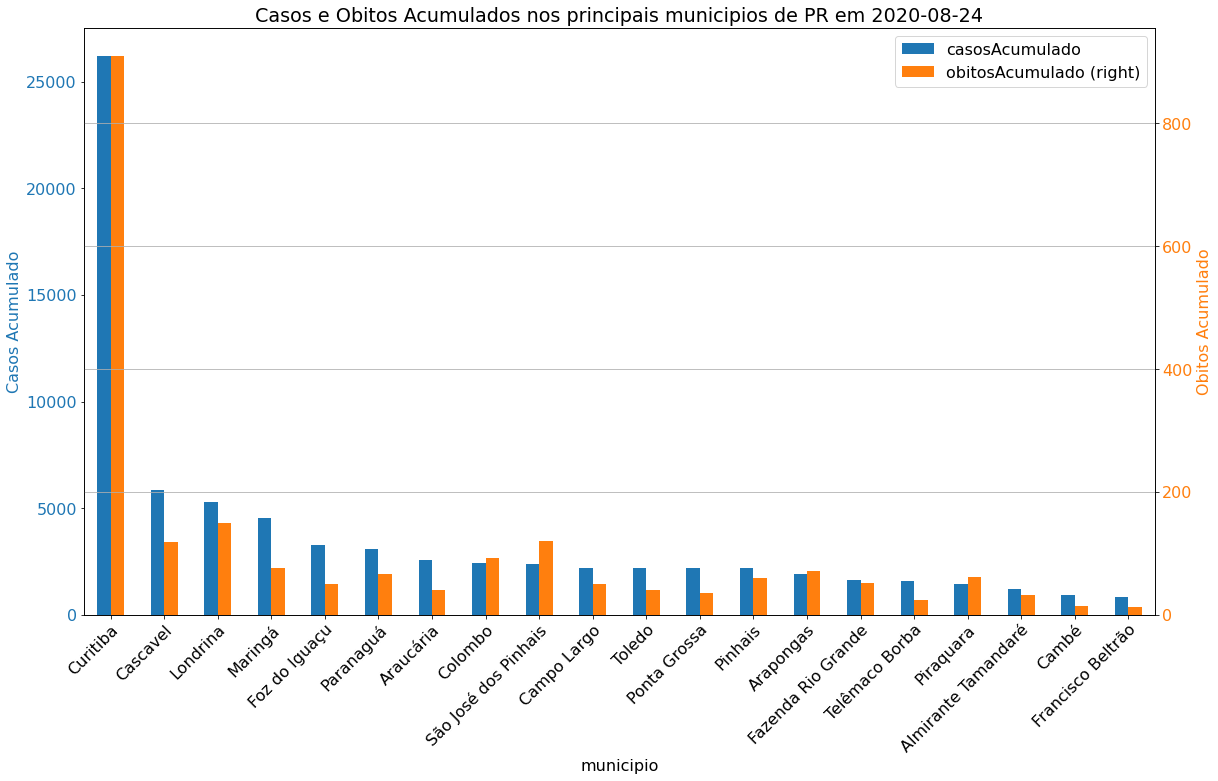

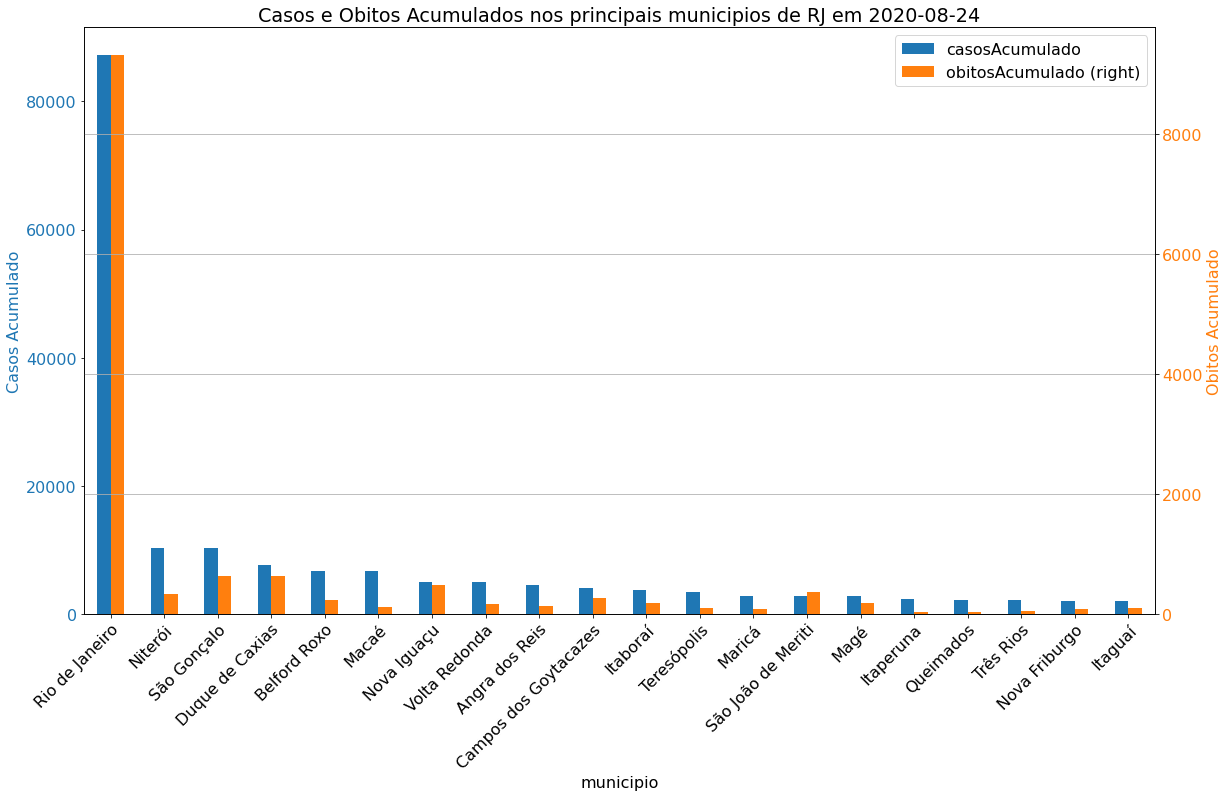

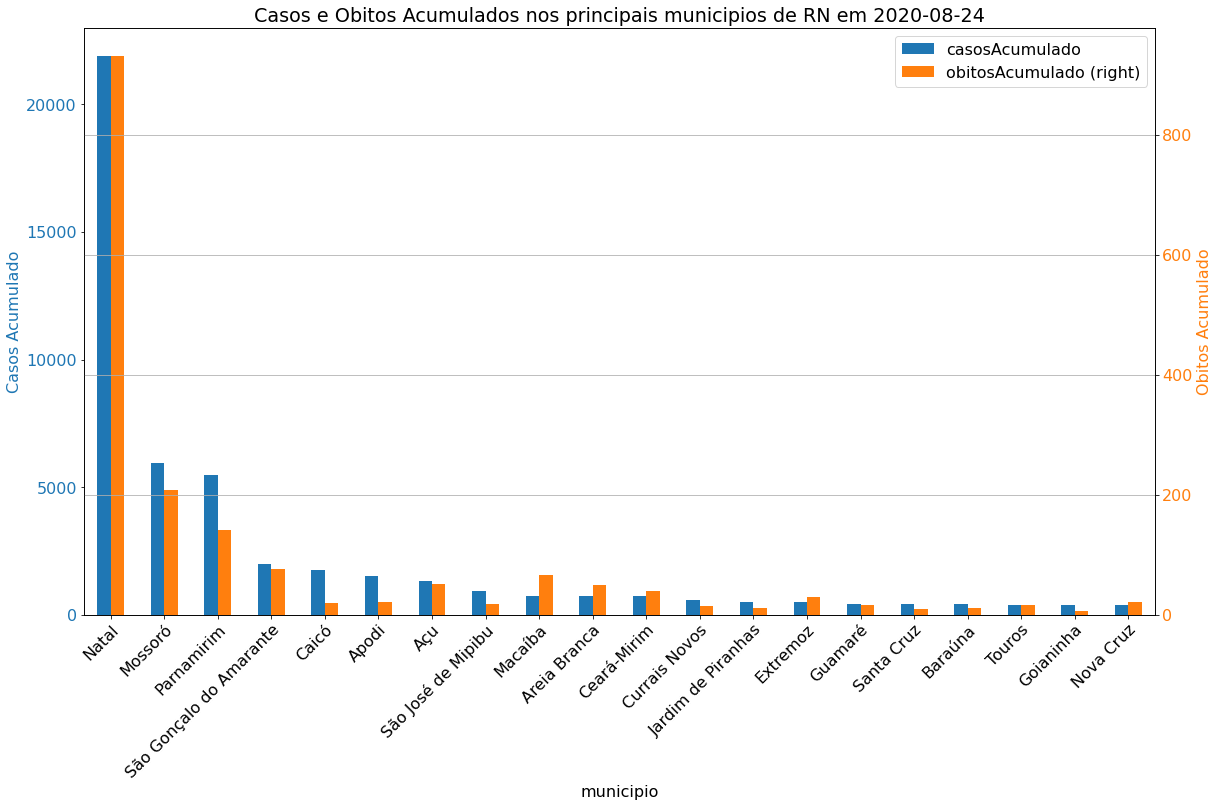

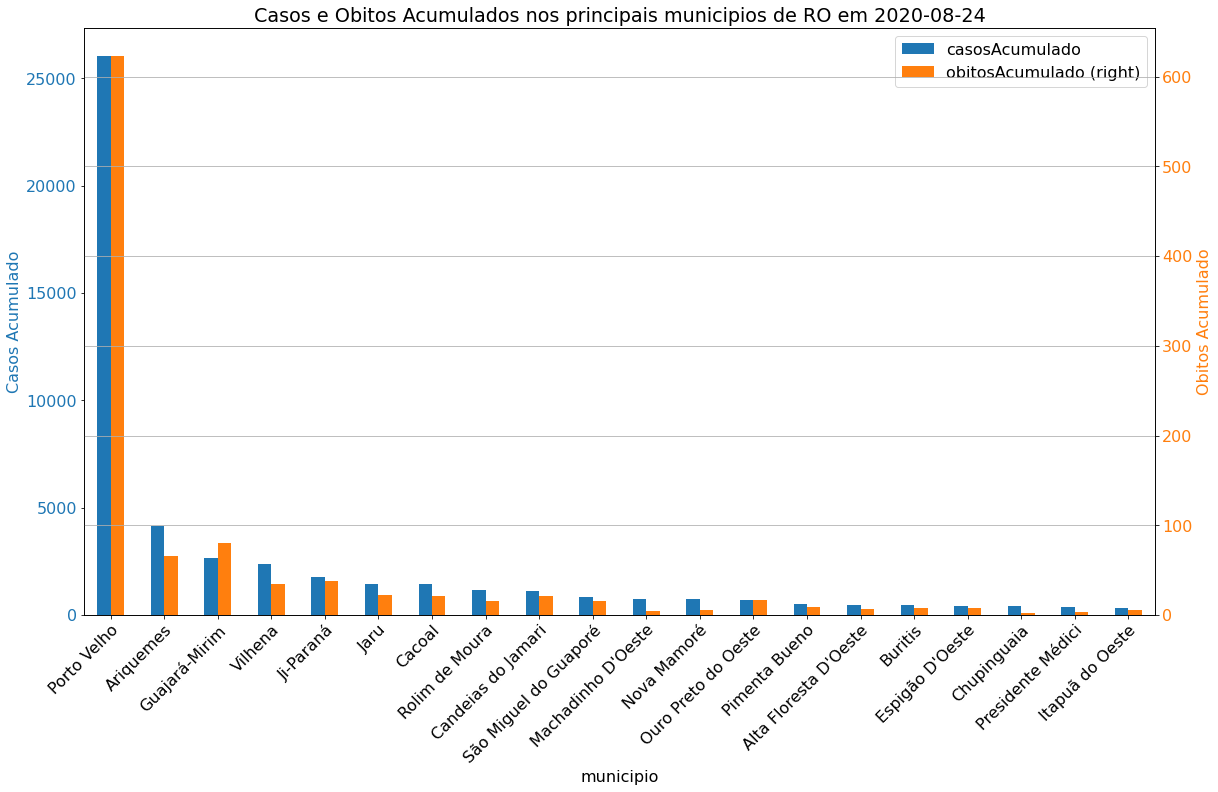

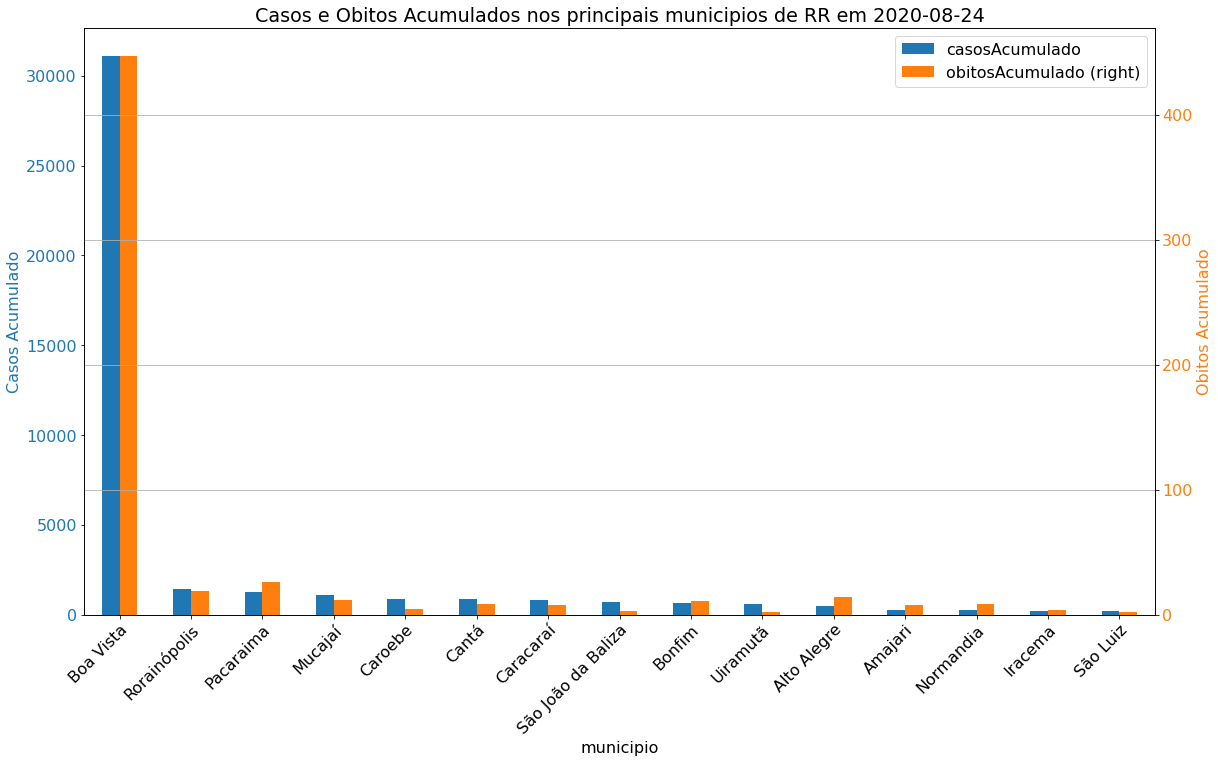

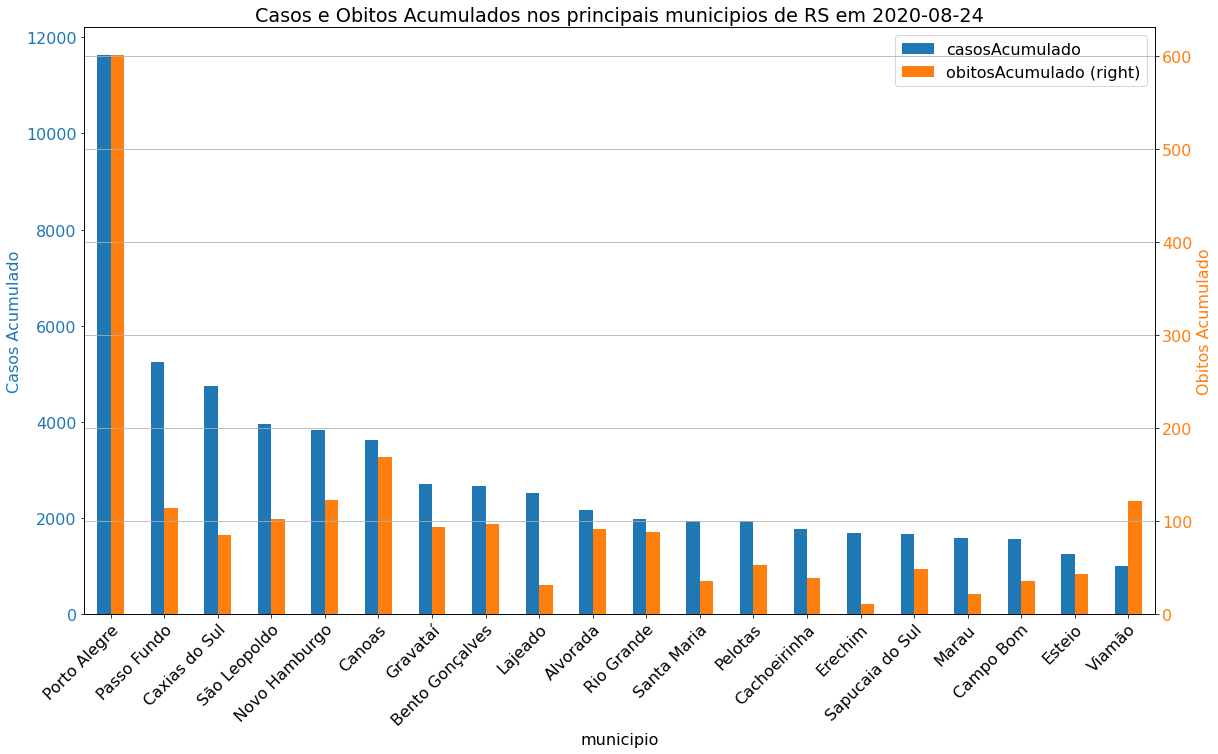

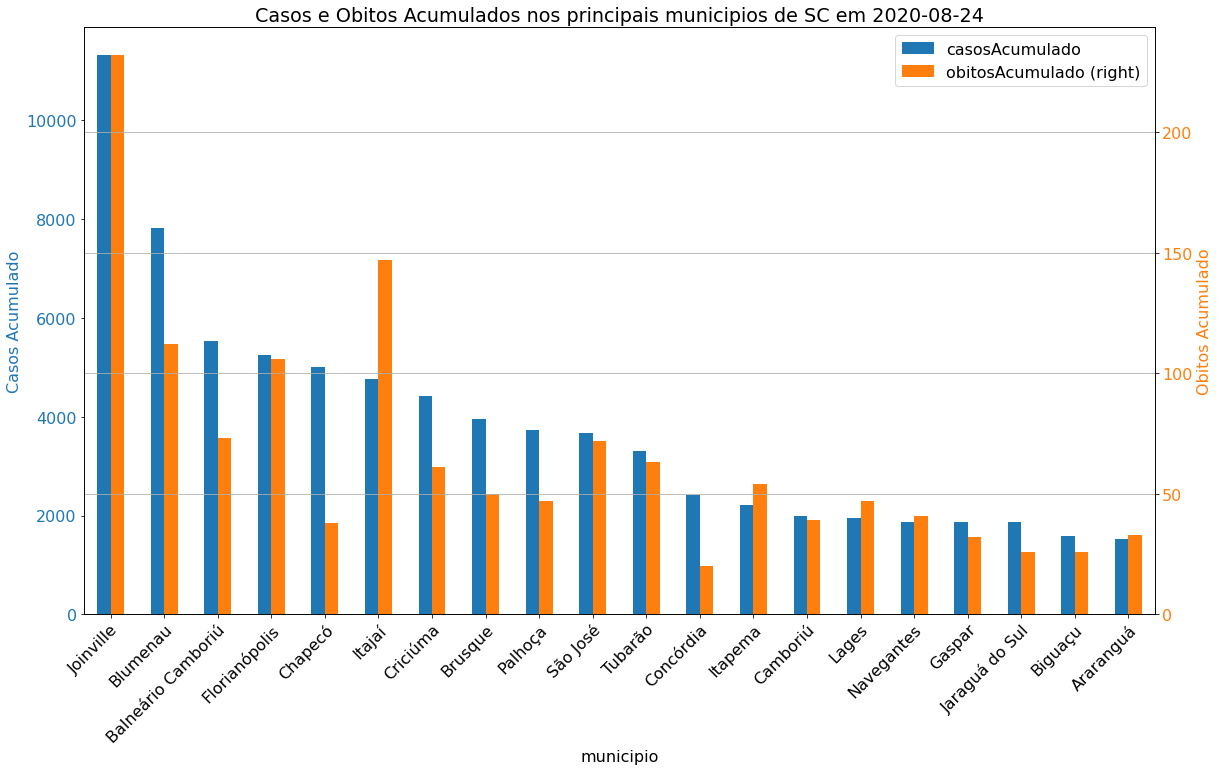

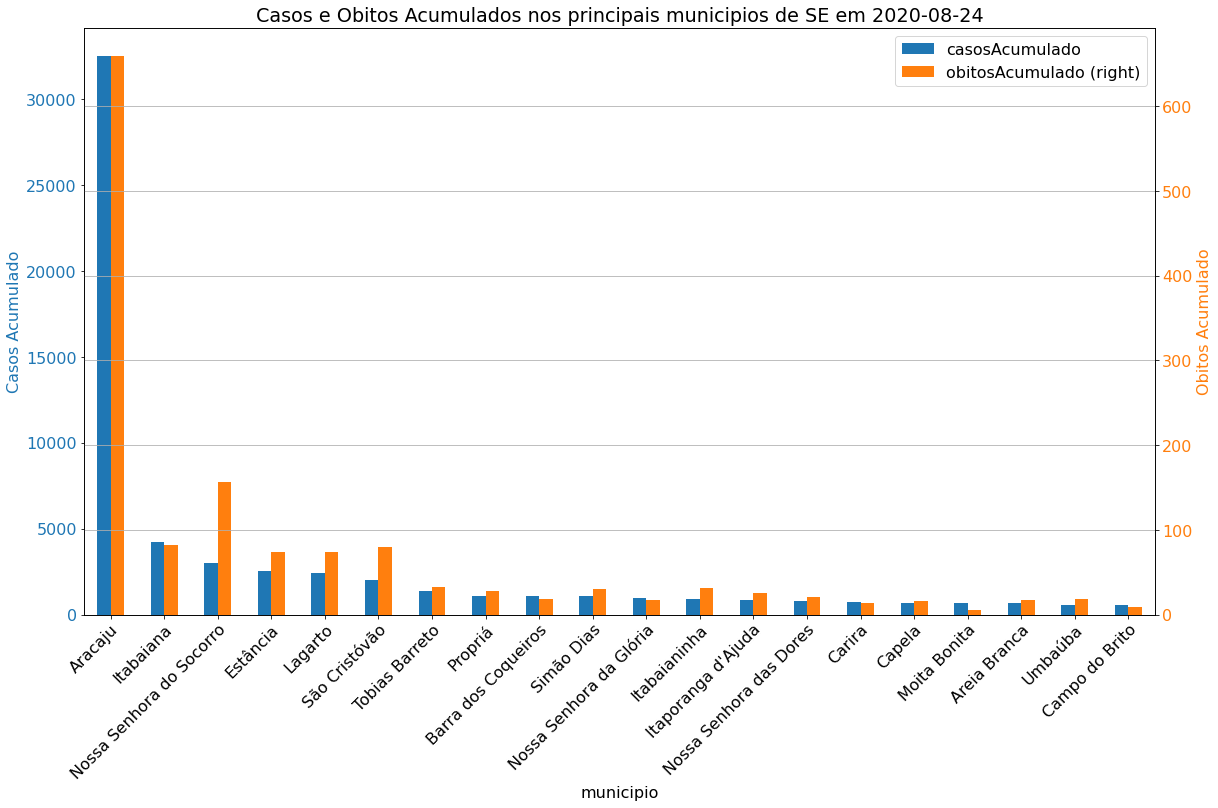

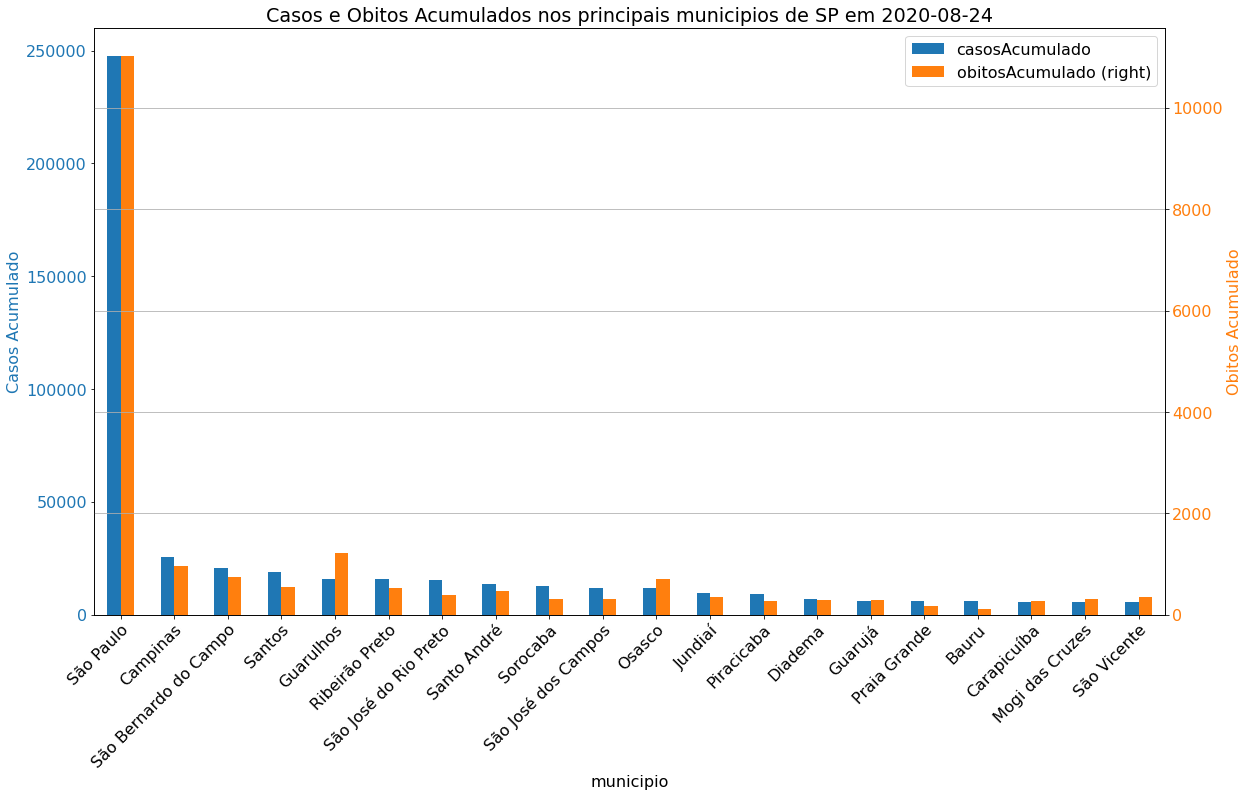

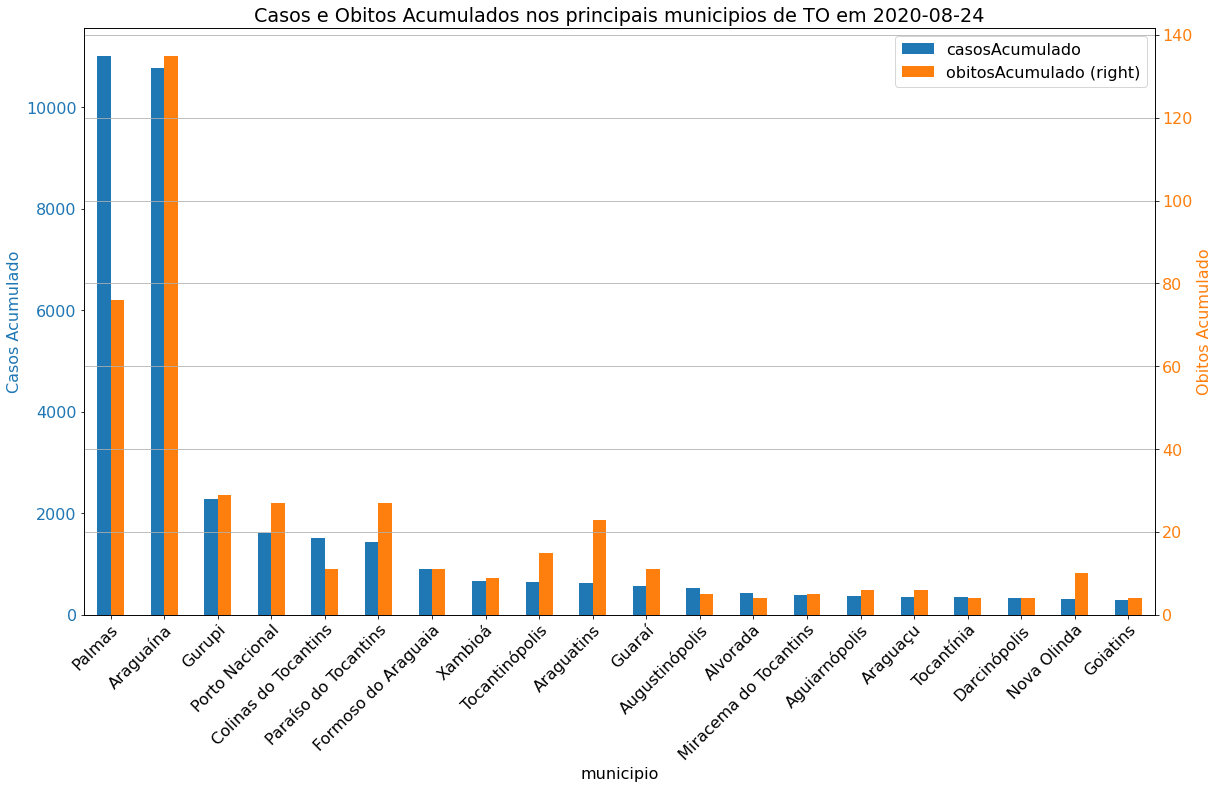

In [13]:
for index in range(len(listState)):

    dfLocation[index].plot.bar(figsize=(19.20,10.80), secondary_y= 'obitosAcumulado')

    ax1, ax2 = plt.gcf().get_axes()

    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    plt.title('Casos e Obitos Acumulados nos principais municipios de ' +str(listState[index]) + ' em ' +str(recent_date))
    
    color = 'tab:blue'
    ax1.set_ylabel('Casos Acumulado', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    color = 'tab:orange'
    ax2.set_ylabel('Obitos Acumulado', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.grid()
    plt.show()

In [14]:
xxxx

NameError: name 'xxxx' is not defined

### Municipios por estado

In [ ]:
dfMS

In [ ]:
listState_02 = dfMS['estado'].astype(str).unique()
listState_02

In [ ]:
listCity_02 = principaisMun['municipio'].astype(str).unique()
listCity_02

In [ ]:
len(listCity_02)

In [ ]:
dfMS = dfMS[dfMS['municipio'].isin(listCity_02)]
dfMS = dfMS.sort_values(by=['estado','municipio'], ascending=True)
dfMS

In [ ]:
testMun = []
dMunicipio = []
dEstado = {}

dTest = {}

for index in range(len(listState_02)):
    
    dEstado[index] = dfMS[dfMS['estado'] == listState_02[index]]
    dEstado[index] = dEstado[index].dropna()
    dEstado[index].reset_index(drop=True, inplace=True)
    
    testMun = dEstado[index]['municipio'].astype(str).unique()
    dMunicipio.append(testMun)

    for jindex in range(len(dMunicipio[index])):
        dTest[jindex] = dfMS[dfMS['municipio'] == testMun[jindex]]
        dTest[jindex] = dTest[jindex].dropna()
        dTest[jindex].reset_index(drop=True, inplace=True)
        print(dTest[jindex])

In [ ]:
timestamps = sorted(set(dfMS.loc[:, 'data'].values))

In [ ]:
# dEstado = {}
# for index in range(len(listState)):
#     dEstado[index] = dfMS[dfMS['estado'] == listState[index]]
#     dEstado[index] = dEstado[index].dropna()
#     dEstado[index].reset_index(drop=True, inplace=True)

In [ ]:
# testMun = []
# dMunicipio = []
# for index in range(len(listState)):
#     testMun = dEstado[index]['municipio'].astype(str).unique()
#     dMunicipio.append(testMun)

In [ ]:
for index in range(len(listState)):
    testMun = dEstado[index]['municipio'].astype(str).unique()
    dMunicipio.append(testMun)
    print(listState[index],len(dMunicipio[index]))

In [ ]:
# for index in range(len(listState)):
#     testMun = dEstado[index]['municipio'].astype(str).unique()
#     dMunicipio.append(testMun)
#     print()
#     for jindex in range(len(dMunicipio[index])):
#         print(listState[index],testMun[jindex])

In [ ]:
dMunicipio[0]

In [ ]:
dfMSelect = dfMS.loc[:,['data','estado','municipio','casosNovos','obitosNovos']]
sumCases = dfMSelect.groupby(['estado']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['casosNovos'] <= 120000, ['estado']] = 'Other_States'

In [ ]:
sumCases = sumCases.groupby(['estado']).sum()
sumCases = sumCases.sort_values(by=['casosNovos'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

In [ ]:
sumCases.groupby(['estado']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [ ]:
# fig = plt.figure(figsize=(19.20,10.80)) # Create matplotlib figure
# ax = fig.add_subplot(111) # Create matplotlib axes



# width = 0.4
# dfSP.casosAcumulado.plot(kind='bar',color='red', ax=ax, width=width, position=1)
# ax.set_ylabel('Casos Acumulados')
# ax.set_xlabel('municipio')

# ax2 = ax.twinx() 


# dfSP.obitosAcumulado.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
# ax.set_ylabel('Obtidos Acumulados')

# ax2.set_ylabel('Price')

# plt.grid()
# plt.show()

In [ ]:
# fig, ax1 = plt.subplots(figsize=(19.20,10.80))

# color = 'tab:blue'
# ax1.bar(dfSP.index, dfSP.casosAcumulado, color=color, label='Total Cases')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Total Cases', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y')
# plt.grid()

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.bar(dfSP.index, dfSP.obitosAcumulado, color=color, label = 'Total Deaths')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Total Deaths', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# # ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# plt.gcf().autofmt_xdate()

# fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# plt.show()

In [ ]:
# fig, ax1 = plt.subplots(figsize=(19.20,10.80))

# color = 'tab:blue'
# ax1.bar(dfSP.index, dfSP.casosAcumulado, color=color, label='Total Cases')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Total Cases', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y')
# plt.grid()

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.bar(dfSP.index, dfSP.obitosAcumulado, color=color, label = 'Total Deaths')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Total Deaths', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# # ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# plt.gcf().autofmt_xdate()

# fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# plt.show()

# NAO DELETAR

In [ ]:
# dfSP = dfToday[(dfToday['estado'] == 'SP') & (dfToday['casosAcumulado'] > 3500)]
# dfSP = dfSP.sort_values(by=['casosAcumulado'], ascending=False)
# dfSP

In [ ]:
# today = pd.to_datetime("today").date()
# today

In [ ]:
# dfSP.plot.barh(x='municipio', y=['casosAcumulado','obitosAcumulado'], figsize=(19.20,10.80))
# plt.title('Daily cases and deaths in SP - '+str(today))
# plt.grid()

In [ ]:
# dfSP = dfSP.loc[:,['municipio','casosAcumulado','obitosAcumulado']]
# dfSP = dfSP.set_index('municipio')
# dfSP

In [ ]:
# dfSP

In [ ]:
# dfSP.plot.bar(figsize=(19.20,10.80), secondary_y= 'obitosAcumulado')

# ax1, ax2 = plt.gcf().get_axes()
# # ax1.tick_params(axis='x', labelrotation=55, ha='right')
# # plt.xticks(rotation=15,ha='right')
# plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# color = 'tab:blue'
# ax1.set_ylabel('Casos Acumulado', color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# color = 'tab:orange'
# ax2.set_ylabel('Obitos Acumulado', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# # plt.title('Casos e obitos acumulados nos municipios de '+str(dfEstado[10]+' em '+str(today)))

# plt.grid()
# plt.show()

In [ ]:
# principaisMun = dfToday[
#         (dfToday['casosAcumulado'] >= 150) & 
#         (dfToday['obitosAcumulado'] >= 150)
# ]
# mprincipaisMun = principaisMun.sort_values(by=['casosAcumulado'], ascending=True)
# principaisMun = principaisMun.dropna()
# principaisMun